In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Mean Squared Error: 0.0823743055797762


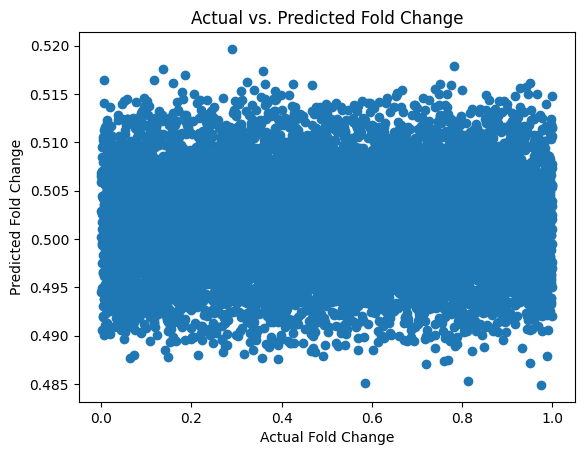

In [1]:
# Assuming 'X' is your sequence embeddings and 'y' is your fold change labels
# Replace these with your actual data
X = np.random.rand(50000, 10)  # Example: 50,000 samples with 10 features each
y = np.random.rand(50000)      # Example: 50,000 fold change values, change this to accessing from pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change')
plt.show()
